In [18]:
# importing required libraries
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from umap import UMAP
from sklearn.decomposition import PCA

In [5]:
# UMAP
df = pd.read_csv(os.getcwd() + "/who-life-expectancy-data.csv")
# selecting certain arbitrary features and renaming for sake of comfort
df = df.loc[:,['Adult Mortality', 'infant deaths', 'Measles ', 'Polio', ' HIV/AIDS', 'Schooling', 'GDP', 'under-five deaths ','Life expectancy ']]
df = df.rename(columns={
    'Adult Mortality':'adult_mortality',
    'Measles ':'measles',
    'Polio':'polio',
    ' HIV/AIDS':'hiv_aids',
    'Schooling':'schooling',
    'GDP':'gdp',
    'under_five deaths':'under_five_deaths',
    'Life expectancy ':'life_expectancy'
})
df.head()
X = df.drop('life_expectancy', 1)
y = df['life_expectancy']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_test = X_test.dropna(axis=0)
X_train = X_train.dropna(axis=0)

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
reducer = UMAP()
X_train = reducer.fit_transform(X_train)

In [10]:
principal_df = pd.DataFrame(data=X_train, columns=['component_one', 'component_two'])
principal_df.head()

,component_one,component_two
0,10.684687,7.494608
1,-4.268198,5.710423
2,4.094930,11.393151
3,4.632477,9.582321
4,13.553978,8.308064


In [11]:
final_df = pd.concat([principal_df, df[['life_expectancy']]], axis=1)
final_df.head()

,component_one,component_two,life_expectancy
0,10.684687,7.494608,65.0
1,-4.268198,5.710423,59.9
2,4.094930,11.393151,59.9
3,4.632477,9.582321,59.5
4,13.553978,8.308064,59.2


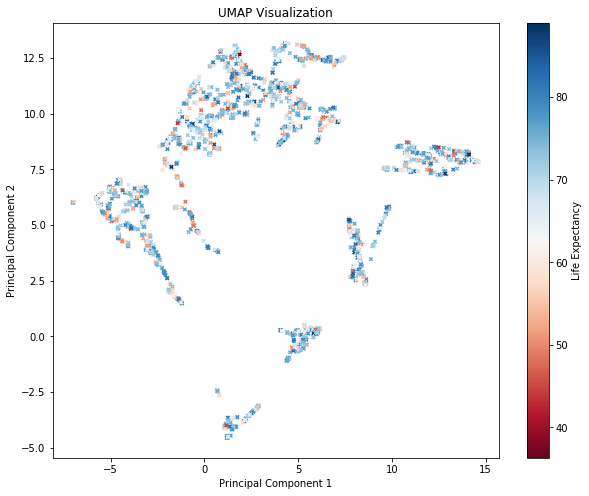

In [17]:
plt.figure(figsize=(10,8))
plt.scatter(
    final_df.iloc[:, 0], 
    final_df.iloc[:,1], 
    marker='x', 
    c= final_df.life_expectancy,
    s=12,
    cmap='RdBu'
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('UMAP Visualization')
cbar = plt.colorbar()
cbar.set_label('Life Expectancy')